In [1]:
#! pip install xgboost
from xgboost.sklearn import XGBRegressor

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import pyplot
import sklearn
from sklearn import metrics
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import mean_tweedie_deviance
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

# Hide Warnings
import warnings
warnings.filterwarnings("ignore")

In [3]:
df_train = pd.read_csv(r"C:\Users\User\Desktop\codes_data\Sandstone\Train_Data_Sand_final.csv")
df_train.head()

,MD,DEN,GR,PERM,NEU,POR,RES_DEP,RES_MED,RES_SLW,New_feat,New_feat2,New_feat3,New_feat4,New_feat5,New_feat6,New_feat7,SW,T2LM
0,3153.9180,2.6255,111.6507,0.002856,0.2451,0.0350,2.4820,2.3209,2.1170,3.62550,2.8706,1.03500,0.035000,17.121300,1.00,0.646870,1.00000,1.116474
1,3059.8872,2.3439,51.3317,13.115390,0.1195,0.1722,6.6866,4.6192,2.1794,2.61980,2.4634,0.44810,0.047510,10.968882,0.28,-2.264150,0.27590,199.653700
2,1271.2000,2.1300,40.2600,5749.670000,0.2800,0.3000,1.3900,27.8000,10.4000,2.81212,2.4100,0.98212,0.204636,9.260335,0.68,-0.631068,0.68212,146.890100
3,3055.9248,2.6137,103.4771,2.204989,0.1980,0.0381,5.8435,5.9513,4.1498,3.61370,2.8117,1.03810,0.038100,16.445610,1.00,0.646870,1.00000,35.907670
4,3201.4668,2.5744,129.7570,0.005124,0.2313,0.0572,2.2890,2.3533,2.1996,3.57440,2.8057,1.05720,0.057200,18.276937,1.00,0.646870,1.00000,2.219201


In [4]:
df_test = pd.read_csv(r"C:\Users\User\Desktop\codes_data\Sandstone\Test_Data_Sand_Final.csv")
df_test.head()

,MD,DEN,GR,PERM,NEU,POR,RES_DEP,RES_MED,RES_SLW,New_feat,New_feat2,New_feat3,New_feat4,New_feat5,New_feat6,New_feat7,SW,T2LM
0,1266.3000,2.2700,114.0700,0.050000,0.4100,0.2600,0.4100,0.6100,0.6500,3.2700,2.6800,1.2600,0.260000,16.091579,1.00,0.646870,1.0000,6.346738
1,3165.9576,2.4988,166.8955,0.016207,0.3344,0.1025,1.9151,1.8651,1.7148,3.4988,2.8332,1.1025,0.102500,20.421520,1.00,0.646870,1.0000,2.659890
2,3054.4008,2.3077,56.0079,35.652750,0.0987,0.1935,15.1619,12.6920,6.6135,2.4718,2.4064,0.3576,0.031753,11.368792,0.16,-2.713607,0.1641,292.149200
3,3147.0600,2.6167,90.9038,0.000213,0.1945,0.0337,3.2695,3.2479,2.8147,3.6167,2.8112,1.0337,0.033700,15.422969,1.00,0.646870,1.0000,3.029543
4,3158.9472,2.6398,71.0053,0.000085,0.0599,0.0146,11.9478,11.8025,8.0843,3.6398,2.6997,1.0146,0.014600,13.690865,1.00,0.646870,1.0000,5.726916


In [5]:
#set MD as index
df_train = df_train.set_index('MD')
df_train.head()

,DEN,GR,PERM,NEU,POR,RES_DEP,RES_MED,RES_SLW,New_feat,New_feat2,New_feat3,New_feat4,New_feat5,New_feat6,New_feat7,SW,T2LM
MD,,,,,,,,,,,,,,,,,
3153.9180,2.6255,111.6507,0.002856,0.2451,0.0350,2.4820,2.3209,2.1170,3.62550,2.8706,1.03500,0.035000,17.121300,1.00,0.646870,1.00000,1.116474
3059.8872,2.3439,51.3317,13.115390,0.1195,0.1722,6.6866,4.6192,2.1794,2.61980,2.4634,0.44810,0.047510,10.968882,0.28,-2.264150,0.27590,199.653700
1271.2000,2.1300,40.2600,5749.670000,0.2800,0.3000,1.3900,27.8000,10.4000,2.81212,2.4100,0.98212,0.204636,9.260335,0.68,-0.631068,0.68212,146.890100
3055.9248,2.6137,103.4771,2.204989,0.1980,0.0381,5.8435,5.9513,4.1498,3.61370,2.8117,1.03810,0.038100,16.445610,1.00,0.646870,1.00000,35.907670
3201.4668,2.5744,129.7570,0.005124,0.2313,0.0572,2.2890,2.3533,2.1996,3.57440,2.8057,1.05720,0.057200,18.276937,1.00,0.646870,1.00000,2.219201


In [6]:
# create the inputs and outputs for train data
X_train = df_train.drop(['T2LM', 'New_feat', 'New_feat2', 'New_feat3', 'New_feat4', 'New_feat5', 'New_feat6', 'New_feat7'], 1) #Feature Matrix
y_train = df_train[['T2LM']]

In [7]:
#set MD as index
df_test = df_test.set_index('MD')
df_test.head()

,DEN,GR,PERM,NEU,POR,RES_DEP,RES_MED,RES_SLW,New_feat,New_feat2,New_feat3,New_feat4,New_feat5,New_feat6,New_feat7,SW,T2LM
MD,,,,,,,,,,,,,,,,,
1266.3000,2.2700,114.0700,0.050000,0.4100,0.2600,0.4100,0.6100,0.6500,3.2700,2.6800,1.2600,0.260000,16.091579,1.00,0.646870,1.0000,6.346738
3165.9576,2.4988,166.8955,0.016207,0.3344,0.1025,1.9151,1.8651,1.7148,3.4988,2.8332,1.1025,0.102500,20.421520,1.00,0.646870,1.0000,2.659890
3054.4008,2.3077,56.0079,35.652750,0.0987,0.1935,15.1619,12.6920,6.6135,2.4718,2.4064,0.3576,0.031753,11.368792,0.16,-2.713607,0.1641,292.149200
3147.0600,2.6167,90.9038,0.000213,0.1945,0.0337,3.2695,3.2479,2.8147,3.6167,2.8112,1.0337,0.033700,15.422969,1.00,0.646870,1.0000,3.029543
3158.9472,2.6398,71.0053,0.000085,0.0599,0.0146,11.9478,11.8025,8.0843,3.6398,2.6997,1.0146,0.014600,13.690865,1.00,0.646870,1.0000,5.726916


In [8]:
# create the inputs and outputs for test data
X_test = df_test.drop(['T2LM', 'New_feat', 'New_feat2', 'New_feat3', 'New_feat4', 'New_feat5', 'New_feat6', 'New_feat7'], 1) #Feature Matrix
y_test = df_test[['T2LM']]

In [9]:
# XGBoost Regressor
model = XGBRegressor()

model.fit(X_train, y_train)

# evaluate the model
pred = model.predict(X_test)

# Evaluate model predictions

model_score_train = model.score(X_train, y_train)
model_score_test = model.score(X_test, y_test)
model_mae = metrics.mean_absolute_error(y_test, pred)
model_mse = metrics.mean_squared_error(y_test, pred)
model_rmse = np.sqrt(metrics.mean_squared_error(y_test, pred))
print('Accuracy of train data:',model_score_train)
print('Accuracy of test data:',model_score_test)
print('Mean Absolute Error:',model_mae)  
print('Mean Squared Error:',model_mse)  
print('Root Mean Squared Error:',model_rmse)
print('MAPE %.3f' % (metrics.mean_absolute_percentage_error(y_test, pred)))
print('MPD %.3f' % (metrics.mean_tweedie_deviance(y_test, pred, power=1)))

Accuracy of train data: 0.9999182076486153
Accuracy of test data: 0.8106953597643725
Mean Absolute Error: 16.323418023839285
Mean Squared Error: 1918.711248177129
Root Mean Squared Error: 43.803096330934515
MAPE 0.484


ValueError: Mean Tweedie deviance error with power=1 can only be used on non-negative y and strictly positive y_pred.

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

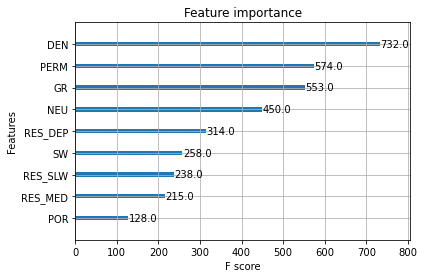

In [10]:
from xgboost import plot_importance
plot_importance(model)

In [9]:
# create the inputs and outputs for train data
X_train = df_train.drop(['T2LM', 'RES_DEP', 'RES_MED', 'RES_SLW', 'DEN', 'POR', 'New_feat4', 'New_feat6'], 1) #Feature Matrix
y_train = df_train[['T2LM']]

In [10]:
# create the inputs and outputs for test data
X_test = df_test.drop(['T2LM', 'RES_DEP', 'RES_MED', 'RES_SLW', 'DEN', 'POR', 'New_feat4', 'New_feat6'], 1) #Feature Matrix
y_test = df_test[['T2LM']]

In [11]:
# XGBoost Regressor
model = XGBRegressor()

model.fit(X_train, y_train)

# evaluate the model
pred = model.predict(X_test)

# Evaluate model predictions

model_score_train = model.score(X_train, y_train)
model_score_test = model.score(X_test, y_test)
model_mae = metrics.mean_absolute_error(y_test, pred)
model_mse = metrics.mean_squared_error(y_test, pred)
model_rmse = np.sqrt(metrics.mean_squared_error(y_test, pred))
print('Accuracy of train data:',model_score_train)
print('Accuracy of test data:',model_score_test)
print('Mean Absolute Error:',model_mae)  
print('Mean Squared Error:',model_mse)  
print('Root Mean Squared Error:',model_rmse)
print('MAPE %.3f' % (metrics.mean_absolute_percentage_error(y_test, pred)))
print('MPD %.3f' % (metrics.mean_tweedie_deviance(y_test, pred, power=1)))

Accuracy of train data: 0.999871123437599
Accuracy of test data: 0.8383858529669301
Mean Absolute Error: 15.951075542391079
Mean Squared Error: 1638.052196665298
Root Mean Squared Error: 40.4728575302671
MAPE 0.485
MPD 10.409


<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

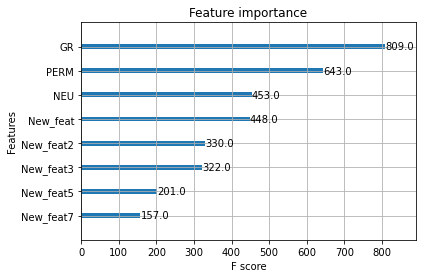

In [15]:
from xgboost import plot_importance
plot_importance(model)

In [16]:
# XGBoost Regressor
model = XGBRegressor(learning_rate= 0.29532415722372746,
             max_depth= 1500,
             n_estimators=1022,
             n_jobs=26)

model.fit(X_train, y_train)

# evaluate the model
pred = model.predict(X_test)

# Evaluate model predictions

model_score_train = model.score(X_train, y_train)
model_score_test = model.score(X_test, y_test)
model_mae = metrics.mean_absolute_error(y_test, pred)
model_mse = metrics.mean_squared_error(y_test, pred)
model_rmse = np.sqrt(metrics.mean_squared_error(y_test, pred))
print('Accuracy of train data:',model_score_train)
print('Accuracy of test data:',model_score_test)
print('Mean Absolute Error:',model_mae)  
print('Mean Squared Error:',model_mse)  
print('Root Mean Squared Error:',model_rmse)
print('MAPE %.3f' % (metrics.mean_absolute_percentage_error(y_test, pred)))
print('MPD %.3f' % (metrics.mean_tweedie_deviance(y_test, pred, power=1)))

Accuracy of train data: 0.9999999999719094
Accuracy of test data: 0.8142612333126199
Mean Absolute Error: 16.25221561019851
Mean Squared Error: 1882.5690718517965
Root Mean Squared Error: 43.388582275199965
MAPE 0.446
MPD 11.574


In [15]:
#!pip install scikit-optimize
from skopt import gp_minimize
from skopt import BayesSearchCV
from skopt.space import Integer, Real

In [16]:
model.get_params() 

{'objective': 'reg:squarederror',
 'base_score': 0.5,
 'booster': 'gbtree',
 'colsample_bylevel': 1,
 'colsample_bynode': 1,
 'colsample_bytree': 1,
 'enable_categorical': False,
 'gamma': 0,
 'gpu_id': -1,
 'importance_type': None,
 'interaction_constraints': '',
 'learning_rate': 0.300000012,
 'max_delta_step': 0,
 'max_depth': 6,
 'min_child_weight': 1,
 'missing': nan,
 'monotone_constraints': '()',
 'n_estimators': 100,
 'n_jobs': 4,
 'num_parallel_tree': 1,
 'predictor': 'auto',
 'random_state': 0,
 'reg_alpha': 0,
 'reg_lambda': 1,
 'scale_pos_weight': 1,
 'subsample': 1,
 'tree_method': 'exact',
 'validate_parameters': 1,
 'verbosity': None}

In [17]:
search_space = {'n_estimators': Integer(1, 1500),
               'learning_rate': Real(1E-10, 0.5, prior="uniform"),
               'max_depth': Integer(1, 1500),
               'n_jobs': Integer(1, 1500)}

bayes_search = BayesSearchCV(model, search_space, cv=3, n_jobs=-1, verbose=1, n_iter=50, random_state=0)

In [18]:
bayes_search.fit(X_train, y_train)

Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fi

BayesSearchCV(cv=3,
              estimator=XGBRegressor(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1,
                                     enable_categorical=False, gamma=0,
                                     gpu_id=-1, importance_type=None,
                                     interaction_constraints='',
                                     learning_rate=0.300000012,
                                     max_delta_step=0, max_depth=6,
                                     min_child_weight=1, missing=nan,
                                     monotone_constraints='()',
                                     n_estimators=10...
              n_jobs=-1, random_state=0,
              search_spaces={'learning_rate': Real(low=1e-10, high=0.5, prior='uniform', transform='normalize'),
                             'max_depth': Integer(low=1, high=1500, prior='uniform', transf

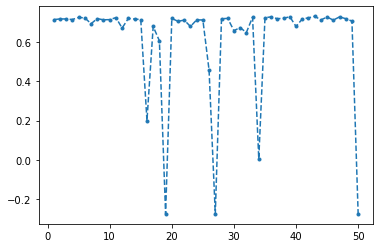

In [19]:
plt.plot(range(1,51), bayes_search.cv_results_['mean_test_score'], '.--')
plt.show()

In [20]:
bayes_search.best_score_

0.730089275841153

In [21]:
bayes_search.best_params_

OrderedDict([('learning_rate', 0.29532415722372746),
             ('max_depth', 1500),
             ('n_estimators', 1022),
             ('n_jobs', 26)])

In [22]:
# Bayes

model = bayes_search.best_estimator_

model.fit(X_train, y_train)

# evaluate the model
pred = model.predict(X_test)

# Print the name and gini importance of each feature
for feature in zip(X_train.columns, model.feature_importances_):
    print(feature)

('GR', 0.016114322)
('PERM', 0.05586889)
('NEU', 0.021783622)
('New_feat', 0.37367672)
('New_feat2', 0.017666476)
('New_feat3', 0.03287469)
('New_feat5', 0.015075646)
('New_feat7', 0.4669396)
('SW', 0.0)


In [23]:
# Evaluate model predictions

model_score_train = model.score(X_train, y_train)
model_score_test = model.score(X_test, y_test)
model_mae = metrics.mean_absolute_error(y_test, pred)
model_mse = metrics.mean_squared_error(y_test, pred)
model_rmse = np.sqrt(metrics.mean_squared_error(y_test, pred))
print('Accuracy of train data:',model_score_train)
print('Accuracy of test data:',model_score_test)
print('Mean Absolute Error:',model_mae)  
print('Mean Squared Error:',model_mse)  
print('Root Mean Squared Error:',model_rmse)
print('MAPE %.3f' % (metrics.mean_absolute_percentage_error(y_test, pred)))
print('MPD %.3f' % (metrics.mean_tweedie_deviance(y_test, pred, power=1)))

Accuracy of train data: 0.9999999999719094
Accuracy of test data: 0.8142612333126199
Mean Absolute Error: 16.25221561019851
Mean Squared Error: 1882.5690718517965
Root Mean Squared Error: 43.388582275199965
MAPE 0.446
MPD 11.574


In [12]:
df_test['XB_Test'] = pred
df_test.head()

,DEN,GR,PERM,NEU,POR,RES_DEP,RES_MED,RES_SLW,New_feat,New_feat2,New_feat3,New_feat4,New_feat5,New_feat6,New_feat7,SW,T2LM,XB_Test
MD,,,,,,,,,,,,,,,,,,
1266.3000,2.2700,114.0700,0.050000,0.4100,0.2600,0.4100,0.6100,0.6500,3.2700,2.6800,1.2600,0.260000,16.091579,1.00,0.646870,1.0000,6.346738,6.138211
3165.9576,2.4988,166.8955,0.016207,0.3344,0.1025,1.9151,1.8651,1.7148,3.4988,2.8332,1.1025,0.102500,20.421520,1.00,0.646870,1.0000,2.659890,2.195066
3054.4008,2.3077,56.0079,35.652750,0.0987,0.1935,15.1619,12.6920,6.6135,2.4718,2.4064,0.3576,0.031753,11.368792,0.16,-2.713607,0.1641,292.149200,280.510254
3147.0600,2.6167,90.9038,0.000213,0.1945,0.0337,3.2695,3.2479,2.8147,3.6167,2.8112,1.0337,0.033700,15.422969,1.00,0.646870,1.0000,3.029543,1.961147
3158.9472,2.6398,71.0053,0.000085,0.0599,0.0146,11.9478,11.8025,8.0843,3.6398,2.6997,1.0146,0.014600,13.690865,1.00,0.646870,1.0000,5.726916,15.988608


In [13]:
df_test.to_csv('Predicted_Test_Data_XB.csv')